## 模型2: 固定收益，最小化风险

$$x_5 = max\{q_i x_i\}$$

In [508]:
import numpy as np
import pandas as pd
import gurobipy as gp
from gurobipy import GRB

In [509]:
s, r, q, p, u = gp.multidict(
    {
        "s0": [0.05, 0, 0, 0],
        "s1": [0.28, 0.025, 0.01, 103],
        "s2": [0.21, 0.015, 0.02, 198],
        "s3": [0.23, 0.055, 0.045, 52],
        "s4": [0.25, 0.026, 0.065, 40],
    }
)

In [510]:
# M：总投资
M = 1

In [511]:
m = gp.Model("模型2")
x = m.addVars(s, name="x")
x5 = m.addVar(name="x5")

In [512]:
m.addConstrs((q[i] * x[i] <= x5 for i in s[1:]), name="x5定义")

{'s1': <gurobi.Constr *Awaiting Model Update*>,
 's2': <gurobi.Constr *Awaiting Model Update*>,
 's3': <gurobi.Constr *Awaiting Model Update*>,
 's4': <gurobi.Constr *Awaiting Model Update*>}

In [513]:
con1_coef = {i: p[i] + 1 for i in s}
m.addConstr(x.prod(con1_coef) == M, name="总投资限制")

<gurobi.Constr *Awaiting Model Update*>

In [514]:
m.setObjective(x5, sense=GRB.MINIMIZE)

k: 最低收益率

In [515]:
cons_coef = {i: r[i] - p[i] for i in s}

In [516]:
results = []
for k in np.arange(0.05, 0.265, 0.005):
    for constr in m.getConstrs():
        if constr.ConstrName == "最低收益限制":
            m.remove(constr)
    m.addConstr(x.prod(cons_coef) >= k * M, name="最低收益限制")
    m.optimize()
    result = [x[i].X for i in x]
    result.append(k)
    result.append(x5.X)
    results.append(result)

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (mac64[arm] - Darwin 23.4.0 23E224)

CPU model: Apple M1 Pro
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 6 rows, 6 columns and 18 nonzeros
Model fingerprint: 0xafd5ca56
Coefficient statistics:
  Matrix range     [1e-02, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e-02, 1e+00]
Presolve time: 0.00s
Presolved: 6 rows, 6 columns, 18 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective  0.000000000e+00
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (mac64[arm] - Darwin 23.4.0 23E224)

CPU model: Apple M1 Pro
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 6 rows, 6 columns and 18 nonzeros
Coefficient statistics:
  Matrix range

In [517]:
m.write("part2.lp")

In [518]:
results_df = pd.DataFrame(results)
results_df.columns = ["s0", "s1", "s2", "s3", "s4", "Q", "V"]
results_df.tail()

,s0,s1,s2,s3,s4,Q,V
39,0.0,0.717365,0.270060,0.0,0.0,0.245,0.017934
40,0.0,0.778443,0.209581,0.0,0.0,0.250,0.019461
41,0.0,0.839521,0.149102,0.0,0.0,0.255,0.020988
42,0.0,0.900599,0.088623,0.0,0.0,0.260,0.022515
43,0.0,0.961677,0.028144,0.0,0.0,0.265,0.024042


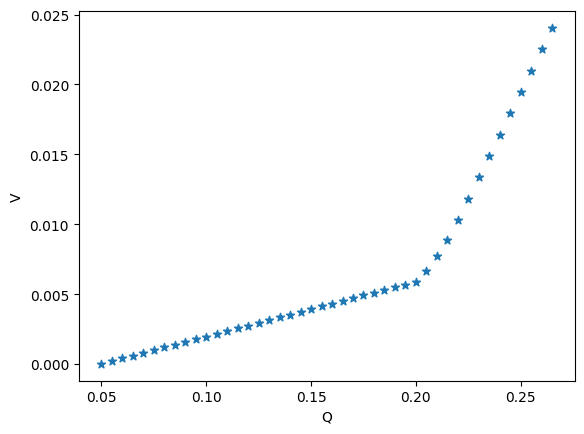

In [519]:
import matplotlib.pyplot as plt

plt.scatter(results_df["Q"], results_df["V"], marker="*")
plt.xlabel("Q")
plt.ylabel("V")
plt.show()